IMPORT LIBRARY

In [ ]:
#CRAWLING DATA
import tweepy

#DATAFRAME
import pandas as pd
import csv

#PRAPROSES
!pip install tweet-preprocessor
import preprocessor as p
import numpy as np
import re
import random
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

#PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#SPLIT DATA
from sklearn.model_selection import train_test_split

#MODEL KLASIFIKASI
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import *

#SMOTE (IMBALANCE DATA)
from imblearn.over_sampling import SMOTE
from collections import Counter

#EVALUASI
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.1 MB/s 


# CRAWLING DATA (Tidak perlu di-*running*)

In [ ]:
access_token = "1500451844161634305-7kVKpxDAA8fN50e4a9VSwQMVssyefd"
access_token_secret = "MC2XVJyDEPjfvCyKDC6yrzM4I4EdUJQ6gMlOydZhNd04E"
api_key = "UA4iwPbAk3vQTOmirJdueM0HJ"
api_secret_key = "TiM3ySHnyQafWhHjKywkchNM82jtkAP95CW0blMoybQLgNY4lZ"

In [ ]:
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
search_key = "Peduli Lindungi"

In [ ]:
csvFile = open('peduliLindungi.csv', 'a+', newline='', encoding='utf-8')

csvWriter = csv.writer(csvFile)

username = []
date = []
#name = []
text = []

for status in tweepy.Cursor(api.search, q=search_key, count=15, lang="id", result_type="mixed", since="2022-05-24", until="2022-05-31").items(2000):

                           username.append(status.user.screen_name)
                           date.append(status.created_at)
                           text.append(status.text)

                           print(status.user.screen_name, status.created_at, status.text)
                                 
                           tweets = [status.user.screen_name, status.created_at, status.text]
                                     
                           csvWriter.writerow(tweets)

GratisTerbaik 2022-05-30 23:59:08 RT @t3luuur: Founder Tokped adalah member WEF pimpinan Klaus Schwab yang nulis buku "The Great Reset"

Pantesan olshop ijo itu kenceng bang…
kariage_soul 2022-05-30 23:56:38 RT @t3luuur: Menkes dan Menkominfo resmi digugat karena diduga melanggar hukum dengan penggunaan aplikasi Peduli Lindungi

@MprAldo @Gratis…
radenkarang1 2022-05-30 23:56:04 RT @t3luuur: Menkes dan Menkominfo resmi digugat karena diduga melanggar hukum dengan penggunaan aplikasi Peduli Lindungi

@MprAldo @Gratis…
fajrwija 2022-05-30 23:36:18 RT @t3luuur: Founder Tokped adalah member WEF pimpinan Klaus Schwab yang nulis buku "The Great Reset"

Pantesan olshop ijo itu kenceng bang…
ikemensimp2_ 2022-05-30 23:34:31 @ningyzhou_ –ini sangat memudahkan kami apalagi kalau bunda harus bawa hp tiap cek in kerja yang selalu pake peduli… https://t.co/ROptBxsf11
trifosamarisa 2022-05-30 23:20:54 Sekarang kalo scan peduli lindungi berasa kayak tiket terusan gak sih?
noturbabesss 2022-05-30 23:1

In [ ]:
#headers = ["Username", "Datetime", "Tweet"]

In [ ]:
#df = pd.read_csv("peduliLindungi.csv", names = headers)

In [ ]:
df = pd.read_csv("peduliLindungi.csv")

In [ ]:
df.dtypes

Username    object
Datetime    object
Tweet       object
dtype: object

In [ ]:
#df.to_csv("peduliLindungi.csv", header = headers, index = False)

In [ ]:
df

,Username,Datetime,Tweet
0,GratisTerbaik,2022-05-30 23:59:08,RT @t3luuur: Founder Tokped adalah member WEF ...
1,kariage_soul,2022-05-30 23:56:38,RT @t3luuur: Menkes dan Menkominfo resmi digug...
2,radenkarang1,2022-05-30 23:56:04,RT @t3luuur: Menkes dan Menkominfo resmi digug...
3,fajrwija,2022-05-30 23:36:18,RT @t3luuur: Founder Tokped adalah member WEF ...
4,ikemensimp2_,2022-05-30 23:34:31,@ningyzhou_ –ini sangat memudahkan kami apalag...
...,...,...,...
979,undipmenfess,2022-05-24 14:28:35,-dips! Ada yang tau cara bikin barcode untuk a...
980,sen13um,2022-05-24 13:36:40,@willfuddle tolong peduli lindungi
981,putrivio3,2022-05-24 13:36:22,Optimalisasi PeduliLindungi oleh Kemenkominfo ...
982,betari_aisah,2022-05-24 13:11:38,Meng juga kudu login peduli lindungi ngga pak?...


In [ ]:
df.head(20)

,Username,Datetime,Tweet
0,GratisTerbaik,2022-05-30 23:59:08,RT @t3luuur: Founder Tokped adalah member WEF ...
1,kariage_soul,2022-05-30 23:56:38,RT @t3luuur: Menkes dan Menkominfo resmi digug...
2,radenkarang1,2022-05-30 23:56:04,RT @t3luuur: Menkes dan Menkominfo resmi digug...
3,fajrwija,2022-05-30 23:36:18,RT @t3luuur: Founder Tokped adalah member WEF ...
4,ikemensimp2_,2022-05-30 23:34:31,@ningyzhou_ –ini sangat memudahkan kami apalag...
5,trifosamarisa,2022-05-30 23:20:54,Sekarang kalo scan peduli lindungi berasa kaya...
6,noturbabesss,2022-05-30 23:18:42,@sbmptnfess aku dr masuk smpe keluar gaada pak...
7,andisyathirah,2022-05-30 23:18:03,"@KemenkesRI selamat pagi pak/bu, saya mau tany..."
8,CommuterLine,2022-05-30 23:08:31,#RekanCommuters yang ingin naik KRL diwajibkan...
9,Mikhamikhachu14,2022-05-30 22:51:36,RT @t3luuur: Founder Tokped adalah member WEF ...


In [ ]:
df.describe(include="all")

,Username,Datetime,Tweet
count,984,984,984
unique,888,977,693
top,contactap2,2022-05-25 16:30:30,RT @t3luuur: Menkes dan Menkominfo resmi digug...
freq,14,2,167


In [ ]:
df.info

<bound method DataFrame.info of           Username             Datetime  \
0    GratisTerbaik  2022-05-30 23:59:08   
1     kariage_soul  2022-05-30 23:56:38   
2     radenkarang1  2022-05-30 23:56:04   
3         fajrwija  2022-05-30 23:36:18   
4     ikemensimp2_  2022-05-30 23:34:31   
..             ...                  ...   
979   undipmenfess  2022-05-24 14:28:35   
980        sen13um  2022-05-24 13:36:40   
981      putrivio3  2022-05-24 13:36:22   
982   betari_aisah  2022-05-24 13:11:38   
983      APWirawan  2022-05-24 13:04:53   

                                                 Tweet  
0    RT @t3luuur: Founder Tokped adalah member WEF ...  
1    RT @t3luuur: Menkes dan Menkominfo resmi digug...  
2    RT @t3luuur: Menkes dan Menkominfo resmi digug...  
3    RT @t3luuur: Founder Tokped adalah member WEF ...  
4    @ningyzhou_ –ini sangat memudahkan kami apalag...  
..                                                 ...  
979  -dips! Ada yang tau cara bikin barcode untuk a.

In [ ]:
df.duplicated(subset = "Tweet")

0      False
1      False
2       True
3       True
4      False
       ...  
979    False
980    False
981    False
982    False
983    False
Length: 984, dtype: bool

In [ ]:
#MENGHAPUS TWEET DUPLIKASI (SEBELUM PRAPROSES TEKS)
df.drop_duplicates(subset ="Tweet", keep = 'first', inplace = True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,Username,Datetime,Tweet
0,GratisTerbaik,2022-05-30 23:59:08,RT @t3luuur: Founder Tokped adalah member WEF ...
1,kariage_soul,2022-05-30 23:56:38,RT @t3luuur: Menkes dan Menkominfo resmi digug...
2,ikemensimp2_,2022-05-30 23:34:31,@ningyzhou_ –ini sangat memudahkan kami apalag...
3,trifosamarisa,2022-05-30 23:20:54,Sekarang kalo scan peduli lindungi berasa kaya...
4,noturbabesss,2022-05-30 23:18:42,@sbmptnfess aku dr masuk smpe keluar gaada pak...
...,...,...,...
688,undipmenfess,2022-05-24 14:28:35,-dips! Ada yang tau cara bikin barcode untuk a...
689,sen13um,2022-05-24 13:36:40,@willfuddle tolong peduli lindungi
690,putrivio3,2022-05-24 13:36:22,Optimalisasi PeduliLindungi oleh Kemenkominfo ...
691,betari_aisah,2022-05-24 13:11:38,Meng juga kudu login peduli lindungi ngga pak?...


In [ ]:
df.to_csv('nPeduliLindungi.csv', encoding ='utf-8', index=False)

Disini dilakukan crawling kembali, guna penambahan data.

In [ ]:
csvFile = open('addPeduliLindungi.csv', 'a+', newline='', encoding='utf-8')

csvWriter = csv.writer(csvFile)

username = []
date = []
#name = []
text = []

for status in tweepy.Cursor(api.search, q=search_key, count=15, lang="id", result_type="mixed", since="2022-05-24", until="2022-06-1").items(2000):

                           username.append(status.user.screen_name)
                           date.append(status.created_at)
                           text.append(status.text)

                           print(status.user.screen_name, status.created_at, status.text)
                                 
                           tweets = [status.user.screen_name, status.created_at, status.text]
                                     
                           csvWriter.writerow(tweets)

tersayang2015 2022-05-31 23:25:40 RT @t3luuur: Founder Tokped adalah member WEF pimpinan Klaus Schwab yang nulis buku "The Great Reset"

Pantesan olshop ijo itu kenceng bang…
GenkKlega 2022-05-31 23:21:47 RT @t3luuur: Founder Tokped adalah member WEF pimpinan Klaus Schwab yang nulis buku "The Great Reset"

Pantesan olshop ijo itu kenceng bang…
NewtonVaquest 2022-05-31 22:25:17 RT @GratisTerbaik: 'MPR' Gugat Menkes dan Menkominfo terkait Pemaksaan Penggunaan Aplikasi Peduli Lindungi dan E-HAC

https://t.co/egq9E7vx…
Jon75078416 2022-05-31 20:49:59 RT @t3luuur: Founder Tokped adalah member WEF pimpinan Klaus Schwab yang nulis buku "The Great Reset"

Pantesan olshop ijo itu kenceng bang…
utbkuy2 2022-05-31 18:33:32 @sbmptnfess aku ga nunjukin sertifikat vaksin sih, ngga perlu pas itu katanya, tp bawa aja takut di pusat lain dita… https://t.co/D935ynH18S
LaVieEnMelody 2022-05-31 17:26:06 Patunganlah btob
Royalti hyunsik sama minhyuk + director + anak orang kaya + jual mobil changsub + hart

In [ ]:
headers = ["Username", "Datetime", "Tweet"]

In [ ]:
dfa = pd.read_csv("addPeduliLindungi.csv", names = headers)

In [ ]:
#dfa = pd.read_csv("addPeduliLindungi.csv")

In [ ]:
dfa.dtypes

Username    object
Datetime    object
Tweet       object
dtype: object

In [ ]:
dfa.head(10)

,Username,Datetime,Tweet
0,tersayang2015,2022-05-31 23:25:40,RT @t3luuur: Founder Tokped adalah member WEF ...
1,GenkKlega,2022-05-31 23:21:47,RT @t3luuur: Founder Tokped adalah member WEF ...
2,NewtonVaquest,2022-05-31 22:25:17,RT @GratisTerbaik: 'MPR' Gugat Menkes dan Menk...
3,Jon75078416,2022-05-31 20:49:59,RT @t3luuur: Founder Tokped adalah member WEF ...
4,utbkuy2,2022-05-31 18:33:32,@sbmptnfess aku ga nunjukin sertifikat vaksin ...
5,LaVieEnMelody,2022-05-31 17:26:06,Patunganlah btob\nRoyalti hyunsik sama minhyuk...
6,augustxargon,2022-05-31 17:13:38,@tershanjung13 @coldsworrd @baiqnm Scan e pake...
7,LCHANxWJ,2022-05-31 16:49:47,@lasancaina Wkwkwk malu dah pasti kliatan soal...
8,magentazalea,2022-05-31 16:47:29,@sbmptnfess berkas2 dicek lagi jgn sampe ad yg...
9,jarpakepin,2022-05-31 16:21:05,@dzzalea mauk cr yg pke peduli lindungi


In [ ]:
#dfa.to_csv("peduliLindungi.csv", header = headers, index = False)

In [ ]:
dfa.describe(include="all")

,Username,Datetime,Tweet
count,1098,1098,1098
unique,984,1092,782
top,contactap2,2022-05-28 19:05:14,RT @t3luuur: Menkes dan Menkominfo resmi digug...
freq,14,2,168


In [ ]:
dfa.info

<bound method DataFrame.info of             Username             Datetime  \
0      tersayang2015  2022-05-31 23:25:40   
1          GenkKlega  2022-05-31 23:21:47   
2      NewtonVaquest  2022-05-31 22:25:17   
3        Jon75078416  2022-05-31 20:49:59   
4            utbkuy2  2022-05-31 18:33:32   
...              ...                  ...   
1093    undipmenfess  2022-05-24 11:40:49   
1094      txtdrnanas  2022-05-24 11:38:15   
1095  growwithloveee  2022-05-24 11:31:29   
1096   AllDefinitely  2022-05-24 11:28:55   
1097       elokwekey  2022-05-24 11:27:17   

                                                  Tweet  
0     RT @t3luuur: Founder Tokped adalah member WEF ...  
1     RT @t3luuur: Founder Tokped adalah member WEF ...  
2     RT @GratisTerbaik: 'MPR' Gugat Menkes dan Menk...  
3     RT @t3luuur: Founder Tokped adalah member WEF ...  
4     @sbmptnfess aku ga nunjukin sertifikat vaksin ...  
...                                                 ...  
1093  -dips! Mau scan

In [ ]:
dfa.duplicated(subset = "Tweet")

0       False
1        True
2       False
3        True
4       False
        ...  
1093    False
1094    False
1095    False
1096    False
1097    False
Length: 1098, dtype: bool

In [ ]:
#MENGHAPUS TWEET DUPLIKASI (SEBELUM PRAPROSES TEKS)
dfa.drop_duplicates(subset ="Tweet", keep = 'first', inplace = True)
dfa.reset_index(drop=True, inplace=True)

In [ ]:
dfa.head(10)

,Username,Datetime,Tweet
0,tersayang2015,2022-05-31 23:25:40,RT @t3luuur: Founder Tokped adalah member WEF ...
1,NewtonVaquest,2022-05-31 22:25:17,RT @GratisTerbaik: 'MPR' Gugat Menkes dan Menk...
2,utbkuy2,2022-05-31 18:33:32,@sbmptnfess aku ga nunjukin sertifikat vaksin ...
3,LaVieEnMelody,2022-05-31 17:26:06,Patunganlah btob\nRoyalti hyunsik sama minhyuk...
4,augustxargon,2022-05-31 17:13:38,@tershanjung13 @coldsworrd @baiqnm Scan e pake...
5,LCHANxWJ,2022-05-31 16:49:47,@lasancaina Wkwkwk malu dah pasti kliatan soal...
6,magentazalea,2022-05-31 16:47:29,@sbmptnfess berkas2 dicek lagi jgn sampe ad yg...
7,jarpakepin,2022-05-31 16:21:05,@dzzalea mauk cr yg pke peduli lindungi
8,sunghoongfff,2022-05-31 16:20:45,@sbmptnfess nanti sblm masuk scan peduli lindu...
9,needstudyy,2022-05-31 16:18:58,@sbmptnfess iyaaa nder sblm msuk ruangan ntar ...


In [ ]:
dfa

,Username,Datetime,Tweet
0,tersayang2015,2022-05-31 23:25:40,RT @t3luuur: Founder Tokped adalah member WEF ...
1,NewtonVaquest,2022-05-31 22:25:17,RT @GratisTerbaik: 'MPR' Gugat Menkes dan Menk...
2,utbkuy2,2022-05-31 18:33:32,@sbmptnfess aku ga nunjukin sertifikat vaksin ...
3,LaVieEnMelody,2022-05-31 17:26:06,Patunganlah btob\nRoyalti hyunsik sama minhyuk...
4,augustxargon,2022-05-31 17:13:38,@tershanjung13 @coldsworrd @baiqnm Scan e pake...
...,...,...,...
777,undipmenfess,2022-05-24 11:40:49,-dips! Mau scan peduli lindungi pas bgt dishar...
778,txtdrnanas,2022-05-24 11:38:15,Wonpil peduli lindungi 🫂 https://t.co/9Vo5LMVHWT
779,growwithloveee,2022-05-24 11:31:29,@day6confess Wonpil x peduli lindungi
780,AllDefinitely,2022-05-24 11:28:55,@pedulilindungi Hanya mempersulit keadaan. Ped...


In [ ]:
dfa.to_csv('nAddPeduliLindungi.csv', encoding ='utf-8', index=False)

Disini dilakukan penggabungan data crawling pertama dan kedua. tentunya dengan menghapus beberapa kemungkinan duplikasi (namun, karena belum masuk proses praproses maka kemungkinan duplikasi masih ada).

In [ ]:
data = df.append(dfa, ignore_index=True)

In [ ]:
data

,Username,Datetime,Tweet
0,GratisTerbaik,2022-05-30 23:59:08,RT @t3luuur: Founder Tokped adalah member WEF ...
1,kariage_soul,2022-05-30 23:56:38,RT @t3luuur: Menkes dan Menkominfo resmi digug...
2,ikemensimp2_,2022-05-30 23:34:31,@ningyzhou_ –ini sangat memudahkan kami apalag...
3,trifosamarisa,2022-05-30 23:20:54,Sekarang kalo scan peduli lindungi berasa kaya...
4,noturbabesss,2022-05-30 23:18:42,@sbmptnfess aku dr masuk smpe keluar gaada pak...
...,...,...,...
1470,undipmenfess,2022-05-24 11:40:49,-dips! Mau scan peduli lindungi pas bgt dishar...
1471,txtdrnanas,2022-05-24 11:38:15,Wonpil peduli lindungi 🫂 https://t.co/9Vo5LMVHWT
1472,growwithloveee,2022-05-24 11:31:29,@day6confess Wonpil x peduli lindungi
1473,AllDefinitely,2022-05-24 11:28:55,@pedulilindungi Hanya mempersulit keadaan. Ped...


In [ ]:
#MENGHAPUS TWEET DUPLIKASI (SEBELUM PRAPROSES TEKS)
data.drop_duplicates(subset ="Tweet", keep = 'first', inplace = True)
data.reset_index(drop=True, inplace=True)

In [ ]:
data

,Username,Datetime,Tweet
0,GratisTerbaik,2022-05-30 23:59:08,RT @t3luuur: Founder Tokped adalah member WEF ...
1,kariage_soul,2022-05-30 23:56:38,RT @t3luuur: Menkes dan Menkominfo resmi digug...
2,ikemensimp2_,2022-05-30 23:34:31,@ningyzhou_ –ini sangat memudahkan kami apalag...
3,trifosamarisa,2022-05-30 23:20:54,Sekarang kalo scan peduli lindungi berasa kaya...
4,noturbabesss,2022-05-30 23:18:42,@sbmptnfess aku dr masuk smpe keluar gaada pak...
...,...,...,...
791,undipmenfess,2022-05-24 11:40:49,-dips! Mau scan peduli lindungi pas bgt dishar...
792,txtdrnanas,2022-05-24 11:38:15,Wonpil peduli lindungi 🫂 https://t.co/9Vo5LMVHWT
793,growwithloveee,2022-05-24 11:31:29,@day6confess Wonpil x peduli lindungi
794,AllDefinitely,2022-05-24 11:28:55,@pedulilindungi Hanya mempersulit keadaan. Ped...


In [ ]:
#SAVE CSV GUNA PELABELAN MANUAL OLEH SELURUH ANGGOTA KELOMPOK
data.to_csv('fixPeduliLindungi.csv', encoding ='utf-8', index=False)

# LOAD DATA

In [ ]:
#MEMBACA CSV YANG TELAH DILAKUKAN LABELING MANUAL
pL = pd.read_csv("peduliLindungi_LabelingManual.csv")

In [ ]:
pL

,Username,Datetime,Tweet,Caca,Alvin,Jihan,Nur,Label_Manual
0,GratisTerbaik,5/30/2022 23:59,RT @t3luuur: Founder Tokped adalah member WEF ...,0,0,0,1,0
1,kariage_soul,5/30/2022 23:56,RT @t3luuur: Menkes dan Menkominfo resmi digug...,1,1,1,1,1
2,ikemensimp2_,5/30/2022 23:34,@ningyzhou_ –ini sangat memudahkan kami apalag...,1,1,1,1,1
3,trifosamarisa,5/30/2022 23:20,Sekarang kalo scan peduli lindungi berasa kaya...,2,1,1,1,1
4,noturbabesss,5/30/2022 23:18,@sbmptnfess aku dr masuk smpe keluar gaada pak...,1,1,1,0,1
...,...,...,...,...,...,...,...,...
792,undipmenfess,5/24/2022 11:40,-dips! Mau scan peduli lindungi pas bgt dishar...,1,1,1,1,1
793,txtdrnanas,5/24/2022 11:38,Wonpil peduli lindungi 🫂 https://t.co/9Vo5LMVHWT,1,1,1,1,1
794,growwithloveee,5/24/2022 11:31,@day6confess Wonpil x peduli lindungi,1,1,1,1,1
795,AllDefinitely,5/24/2022 11:28,@pedulilindungi Hanya mempersulit keadaan. Ped...,0,0,0,0,0


In [ ]:
#PENGECEKKAN APAKAH ADA DATA YANG NULL (KOSONG)
pL.isnull().sum()

Username        0
Datetime        0
Tweet           0
Caca            0
Alvin           0
Jihan           0
Nur             0
Label_Manual    0
dtype: int64

In [ ]:
new_pL = pL.copy()

In [ ]:
new_pL

,Username,Datetime,Tweet,Caca,Alvin,Jihan,Nur,Label_Manual
0,GratisTerbaik,5/30/2022 23:59,RT @t3luuur: Founder Tokped adalah member WEF ...,0,0,0,1,0
1,kariage_soul,5/30/2022 23:56,RT @t3luuur: Menkes dan Menkominfo resmi digug...,1,1,1,1,1
2,ikemensimp2_,5/30/2022 23:34,@ningyzhou_ –ini sangat memudahkan kami apalag...,1,1,1,1,1
3,trifosamarisa,5/30/2022 23:20,Sekarang kalo scan peduli lindungi berasa kaya...,2,1,1,1,1
4,noturbabesss,5/30/2022 23:18,@sbmptnfess aku dr masuk smpe keluar gaada pak...,1,1,1,0,1
...,...,...,...,...,...,...,...,...
792,undipmenfess,5/24/2022 11:40,-dips! Mau scan peduli lindungi pas bgt dishar...,1,1,1,1,1
793,txtdrnanas,5/24/2022 11:38,Wonpil peduli lindungi 🫂 https://t.co/9Vo5LMVHWT,1,1,1,1,1
794,growwithloveee,5/24/2022 11:31,@day6confess Wonpil x peduli lindungi,1,1,1,1,1
795,AllDefinitely,5/24/2022 11:28,@pedulilindungi Hanya mempersulit keadaan. Ped...,0,0,0,0,0


In [ ]:
#MENGHAPUS KOLOM YANG DIRASA TIDAK DIPERLUKAN LAGI
new_pL = new_pL.drop(columns=['Datetime', 'Caca', 'Alvin', 'Jihan', 'Nur'])

In [ ]:
new_pL

,Username,Tweet,Label_Manual
0,GratisTerbaik,RT @t3luuur: Founder Tokped adalah member WEF ...,0
1,kariage_soul,RT @t3luuur: Menkes dan Menkominfo resmi digug...,1
2,ikemensimp2_,@ningyzhou_ –ini sangat memudahkan kami apalag...,1
3,trifosamarisa,Sekarang kalo scan peduli lindungi berasa kaya...,1
4,noturbabesss,@sbmptnfess aku dr masuk smpe keluar gaada pak...,1
...,...,...,...
792,undipmenfess,-dips! Mau scan peduli lindungi pas bgt dishar...,1
793,txtdrnanas,Wonpil peduli lindungi 🫂 https://t.co/9Vo5LMVHWT,1
794,growwithloveee,@day6confess Wonpil x peduli lindungi,1
795,AllDefinitely,@pedulilindungi Hanya mempersulit keadaan. Ped...,0


In [ ]:
new_pL.describe(include="all")

,Username,Tweet,Label_Manual
count,797,797,797.000000
unique,720,796,NaN
top,contactap2,#NAME?,NaN
freq,14,2,NaN
mean,NaN,NaN,0.937265
std,NaN,NaN,0.463306
min,NaN,NaN,0.000000
25%,NaN,NaN,1.000000
50%,NaN,NaN,1.000000
75%,NaN,NaN,1.000000


In [ ]:
new_pL.info

<bound method DataFrame.info of            Username                                              Tweet  \
0     GratisTerbaik  RT @t3luuur: Founder Tokped adalah member WEF ...   
1      kariage_soul  RT @t3luuur: Menkes dan Menkominfo resmi digug...   
2      ikemensimp2_  @ningyzhou_ –ini sangat memudahkan kami apalag...   
3     trifosamarisa  Sekarang kalo scan peduli lindungi berasa kaya...   
4      noturbabesss  @sbmptnfess aku dr masuk smpe keluar gaada pak...   
..              ...                                                ...   
792    undipmenfess  -dips! Mau scan peduli lindungi pas bgt dishar...   
793      txtdrnanas   Wonpil peduli lindungi 🫂 https://t.co/9Vo5LMVHWT   
794  growwithloveee              @day6confess Wonpil x peduli lindungi   
795   AllDefinitely  @pedulilindungi Hanya mempersulit keadaan. Ped...   
796       elokwekey  Jadi kapan kita gaperlu scan scan peduli lindu...   

     Label_Manual  
0               0  
1               1  
2               1  

In [ ]:
new_pL.isnull().sum()

Username        0
Tweet           0
Label_Manual    0
dtype: int64

In [ ]:
#MENGUBAH LABEL AKHIR YANG AWALNYA BERUPA ANGKA MENJADI KATA (0->NEGATIF, 1->NETRAL, 2->POSITIF)
new_pL["Label_Manual"].replace(0, "Negatif", inplace=True)
new_pL["Label_Manual"].replace(1, "Netral", inplace=True)
new_pL["Label_Manual"].replace(2, "Positif", inplace=True)
new_pL["Label_Manual"]

0      Negatif
1       Netral
2       Netral
3       Netral
4       Netral
        ...   
792     Netral
793     Netral
794     Netral
795    Negatif
796    Negatif
Name: Label_Manual, Length: 797, dtype: object

In [ ]:
new_pL

,Username,Tweet,Label_Manual
0,GratisTerbaik,RT @t3luuur: Founder Tokped adalah member WEF ...,Negatif
1,kariage_soul,RT @t3luuur: Menkes dan Menkominfo resmi digug...,Netral
2,ikemensimp2_,@ningyzhou_ –ini sangat memudahkan kami apalag...,Netral
3,trifosamarisa,Sekarang kalo scan peduli lindungi berasa kaya...,Netral
4,noturbabesss,@sbmptnfess aku dr masuk smpe keluar gaada pak...,Netral
...,...,...,...
792,undipmenfess,-dips! Mau scan peduli lindungi pas bgt dishar...,Netral
793,txtdrnanas,Wonpil peduli lindungi 🫂 https://t.co/9Vo5LMVHWT,Netral
794,growwithloveee,@day6confess Wonpil x peduli lindungi,Netral
795,AllDefinitely,@pedulilindungi Hanya mempersulit keadaan. Ped...,Negatif


In [ ]:
new_pL.to_csv('peduliLindungi_LabelingManual.csv', encoding ='utf-8', index=False)

#PRAPROSES DATA

In [ ]:
#MENGHAPUS MENTION ATAU USERNAME USER PADA TWEET (@USERNAME)
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)         #MENCARI TWEET DENGAN KECOCOKAN KONDISI (ADANYA @USERNAME)
    for i in r:
        input_text = re.sub(i, '', input_text)  #REPLACE STRING TWEET DENGAN KECOCOKAN KONDISI MENJADI KOSONG ATAU ('')
    return input_text

new_pL["remove_mention"] = np.vectorize(remove_pattern)(new_pL["Tweet"], "@[\w]*") #MEMANGGIL METHOD DENGAN MENYIMPANNYA PADA KOLOM -> remove_mention

In [ ]:
new_pL

,Username,Tweet,Label_Manual,remove_mention
0,GratisTerbaik,RT @t3luuur: Founder Tokped adalah member WEF ...,Negatif,RT : Founder Tokped adalah member WEF pimpinan...
1,kariage_soul,RT @t3luuur: Menkes dan Menkominfo resmi digug...,Netral,RT : Menkes dan Menkominfo resmi digugat karen...
2,ikemensimp2_,@ningyzhou_ –ini sangat memudahkan kami apalag...,Netral,–ini sangat memudahkan kami apalagi kalau bun...
3,trifosamarisa,Sekarang kalo scan peduli lindungi berasa kaya...,Netral,Sekarang kalo scan peduli lindungi berasa kaya...
4,noturbabesss,@sbmptnfess aku dr masuk smpe keluar gaada pak...,Netral,aku dr masuk smpe keluar gaada pake peduli li...
...,...,...,...,...
792,undipmenfess,-dips! Mau scan peduli lindungi pas bgt dishar...,Netral,-dips! Mau scan peduli lindungi pas bgt dishar...
793,txtdrnanas,Wonpil peduli lindungi 🫂 https://t.co/9Vo5LMVHWT,Netral,Wonpil peduli lindungi 🫂 https://t.co/9Vo5LMVHWT
794,growwithloveee,@day6confess Wonpil x peduli lindungi,Netral,Wonpil x peduli lindungi
795,AllDefinitely,@pedulilindungi Hanya mempersulit keadaan. Ped...,Negatif,Hanya mempersulit keadaan. Peduli lindungi apa?


In [ ]:
#MENGHAPUS EMOJI PADA TEKS TWEET
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  #emoticons
        u"\U0001F300-\U0001F5FF"  #symbols & pictographs
        u"\U0001F680-\U0001F6FF"  #transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  #flags (iOS)
        u"\U00002500-\U00002BEF"  #chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"                 #dingbats
        u"\u3030"
        "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', text)

new_pL['remove_emoji'] = new_pL['remove_mention'].apply(deEmojify)

In [ ]:
new_pL

,Username,Tweet,Label_Manual,remove_mention,remove_emoji
0,GratisTerbaik,RT @t3luuur: Founder Tokped adalah member WEF ...,Negatif,RT : Founder Tokped adalah member WEF pimpinan...,RT : Founder Tokped adalah member WEF pimpinan...
1,kariage_soul,RT @t3luuur: Menkes dan Menkominfo resmi digug...,Netral,RT : Menkes dan Menkominfo resmi digugat karen...,RT : Menkes dan Menkominfo resmi digugat karen...
2,ikemensimp2_,@ningyzhou_ –ini sangat memudahkan kami apalag...,Netral,–ini sangat memudahkan kami apalagi kalau bun...,–ini sangat memudahkan kami apalagi kalau bun...
3,trifosamarisa,Sekarang kalo scan peduli lindungi berasa kaya...,Netral,Sekarang kalo scan peduli lindungi berasa kaya...,Sekarang kalo scan peduli lindungi berasa kaya...
4,noturbabesss,@sbmptnfess aku dr masuk smpe keluar gaada pak...,Netral,aku dr masuk smpe keluar gaada pake peduli li...,aku dr masuk smpe keluar gaada pake peduli li...
...,...,...,...,...,...
792,undipmenfess,-dips! Mau scan peduli lindungi pas bgt dishar...,Netral,-dips! Mau scan peduli lindungi pas bgt dishar...,-dips! Mau scan peduli lindungi pas bgt dishar...
793,txtdrnanas,Wonpil peduli lindungi 🫂 https://t.co/9Vo5LMVHWT,Netral,Wonpil peduli lindungi 🫂 https://t.co/9Vo5LMVHWT,Wonpil peduli lindungi https://t.co/9Vo5LMVHWT
794,growwithloveee,@day6confess Wonpil x peduli lindungi,Netral,Wonpil x peduli lindungi,Wonpil x peduli lindungi
795,AllDefinitely,@pedulilindungi Hanya mempersulit keadaan. Ped...,Negatif,Hanya mempersulit keadaan. Peduli lindungi apa?,Hanya mempersulit keadaan. Peduli lindungi apa?


In [ ]:
#MEREPLACE SELURUH KETENTUAN DENGAN '' --> YANG BERARTI MENGHILANGKANNYA.
def remove2(text):
  text = re.sub(r"http\S+", '', text)     #MENGHAPUS HYPERLINK

  text = re.sub('[0-9]+', '', text)       #MENGHAPUS ANGKA

  text = re.sub(r'\$\w*', '', text)       #MENGHAPUS STOCK MARKET TICKERS --> $GE
 
  text = re.sub(r'^b"RT[\s]+', '', text)  #MENGHAPUS RT ATAU RETWEET

  text = re.sub(r"^b'[\s]+", '', text)

  text = re.sub(r"^ :[\s]+", '', text)

  text = re.sub(r'[\n]', ' ', text)       #MEREPLACE ENTER MENJADI SPASI

  text = re.sub(r'#', '',text)            #MENGHILANGKAN HASTAG

  return text

new_pL['remove_more'] = new_pL['remove_emoji'].apply(lambda x: remove2(x))
new_pL.sort_values("remove_more", inplace = True)
new_pL.drop_duplicates(subset ="remove_more", keep = 'first', inplace = True)   #SETELAH DATA CLEANING MAKA HAPUS DUPLIKASI DATA TWEET
new_pL.reset_index(drop=True, inplace=True)

In [ ]:
new_pL

,Username,Tweet,Label_Manual,remove_mention,remove_emoji,remove_more
0,BukanSpedaMotor,@donda_abeliam @renjunnhw @parksoojojojoy @bae...,Netral,Peduli lindungi,Peduli lindungi,Peduli lindungi
1,slothlowin_,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @C...,Netral,AYO DONG PEDULI LI… https://t.co/j2ui9i...,AYO DONG PEDULI LI… https://t.co/j2ui9i...,AYO DONG PEDULI LI…
2,massmull_,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,Ada apa neh ?\nPerl… https://t.co/f1r8x...,Ada apa neh ?\nPerl… https://t.co/f1r8x...,Ada apa neh ? Perl…
3,Sofcerred1,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,Butuh Peduli lindungi ngga ci,Butuh Peduli lindungi ngga ci,Butuh Peduli lindungi ngga ci
4,_Sheena______,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,"Hey para bocil"" ak… https://t.co/tydesI...","Hey para bocil"" ak… https://t.co/tydesI...","Hey para bocil"" ak…"
...,...,...,...,...,...,...
755,_Ieemark,"sebel bgt😭 uda bisa vaksin 3 mulai januari, tp...",Negatif,"sebel bgt😭 uda bisa vaksin 3 mulai januari, tp...","sebel bgt uda bisa vaksin 3 mulai januari, tp ...","sebel bgt uda bisa vaksin mulai januari, tp p..."
756,matakhaki,sekarang apa sudah tidak peduli lindungi?,Netral,sekarang apa sudah tidak peduli lindungi?,sekarang apa sudah tidak peduli lindungi?,sekarang apa sudah tidak peduli lindungi?
757,shickencteak,"setelah 15 hari, peduli lindungi udh ijo, geja...",Netral,"setelah 15 hari, peduli lindungi udh ijo, geja...","setelah 15 hari, peduli lindungi udh ijo, geja...","setelah hari, peduli lindungi udh ijo, gejala..."
758,mks_fess,tabe kalo mauki kluar kota masih pake e-hac at...,Netral,tabe kalo mauki kluar kota masih pake e-hac at...,tabe kalo mauki kluar kota masih pake e-hac at...,tabe kalo mauki kluar kota masih pake e-hac at...


In [ ]:
#MELAKUKAN STEP CASE FOLDING (MENGUBAH SELURUH HURUF MENJADI LOWER CASE ATAU HURUF KECIL)
new_pL['remove_more'] = new_pL['remove_more'].str.lower()

In [ ]:
new_pL

,Username,Tweet,Label_Manual,remove_mention,remove_emoji,remove_more
0,BukanSpedaMotor,@donda_abeliam @renjunnhw @parksoojojojoy @bae...,Netral,Peduli lindungi,Peduli lindungi,peduli lindungi
1,slothlowin_,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @C...,Netral,AYO DONG PEDULI LI… https://t.co/j2ui9i...,AYO DONG PEDULI LI… https://t.co/j2ui9i...,ayo dong peduli li…
2,massmull_,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,Ada apa neh ?\nPerl… https://t.co/f1r8x...,Ada apa neh ?\nPerl… https://t.co/f1r8x...,ada apa neh ? perl…
3,Sofcerred1,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,Butuh Peduli lindungi ngga ci,Butuh Peduli lindungi ngga ci,butuh peduli lindungi ngga ci
4,_Sheena______,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,"Hey para bocil"" ak… https://t.co/tydesI...","Hey para bocil"" ak… https://t.co/tydesI...","hey para bocil"" ak…"
...,...,...,...,...,...,...
755,_Ieemark,"sebel bgt😭 uda bisa vaksin 3 mulai januari, tp...",Negatif,"sebel bgt😭 uda bisa vaksin 3 mulai januari, tp...","sebel bgt uda bisa vaksin 3 mulai januari, tp ...","sebel bgt uda bisa vaksin mulai januari, tp p..."
756,matakhaki,sekarang apa sudah tidak peduli lindungi?,Netral,sekarang apa sudah tidak peduli lindungi?,sekarang apa sudah tidak peduli lindungi?,sekarang apa sudah tidak peduli lindungi?
757,shickencteak,"setelah 15 hari, peduli lindungi udh ijo, geja...",Netral,"setelah 15 hari, peduli lindungi udh ijo, geja...","setelah 15 hari, peduli lindungi udh ijo, geja...","setelah hari, peduli lindungi udh ijo, gejala..."
758,mks_fess,tabe kalo mauki kluar kota masih pake e-hac at...,Netral,tabe kalo mauki kluar kota masih pake e-hac at...,tabe kalo mauki kluar kota masih pake e-hac at...,tabe kalo mauki kluar kota masih pake e-hac at...


TOKENISASI + STOPWORD REMOVAL + STEMMING

In [ ]:
#IMPORT TOKENIZE 
from nltk.tokenize import TweetTokenizer

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#MEMBUAT MANUAL STOPWORD YANG DIJUMPAI PADA TWEET
stopword_list = ["kpd", "bun", "mamah", "ke", "tuh", "nya", "blum",
                 "kls", "bang", "ka", "ak", "ttp", "tp", "nih", "ping", "eh",
                 "aing", "kasi", "kak", "gweh", "pak",
                 "kan", "sih", "jd", "tdi", "udh", "yg", "kk", "trs", "gk",
                 "uda", "blm", "wkwk", "lurr", "tpi", "kok", "jir",
                 "lah", "cm", "lo", "sm", "anj", "aja", "tu", "ini", "gpp",
                 "nih", "gak", "anjir", "ya", "dr", "kl", "pak", "dan",
                 "mls", "lagi", "dengan", "deng", "kah", "ngak", "yah", "sya",
                 "nder", "si", "pas", "dah", "tersebut", "ko", "lu", "ituin",
                 "utk", "emg", "tah", "nah", "deh", "dll", "pd", "gw", "egk",
                 "kali", "koh", "kmrn", "gmn", "no", "ayo", "anjing", "kmu",
                 "tak", "shit", "terus", "oh", "emang", "njer", "yo", "euy",
                 "urg", "haha", "krn", "grgr", "syp", "mb", "muk",
                 "sprti", "jan", "ci", "anyingg", "we", "hrs", "sableng",
                 "donk", "nnti", "agr", "mw", "ehhh", "lhoo", "bang", 
                 "hahahahahahahahahahahahahahahahahahahahaah",
                 "wkwkwkwkwkwkwkwkwkwkwkwkkwkwkwwkwkwkwkwkwkwkkwkwkwkwkwkwkwkwkw",
                 "ieuu"
                 ]

In [ ]:
#MENGGABUNGKAN STOPWORD MANUAL DENGAN STOPWORD PADA LIBRARY
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

stopword_factory = stopwords.words('indonesian')

stopword = stopword_factory + stopword_list

diction = ArrayDictionary(stopword)

str = StopWordRemover(diction)

print(stopword)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [ ]:
#IMPORT SASTRAWI STEMMER
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stem = factory.create_stemmer()

In [ ]:
#MEMASTIKAN KEMBALI APAKAH ADA EMOJI YANG TERSISA
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
#MELAKUKAN PENGGABUNGAN EMOTIKON
emoticons = emoticons_happy.union(emoticons_sad)

In [ ]:
#MENJALANKAN TOKENISASI, STOPWORD REMOVAL, DAN STEMMING
def tweets_bersih(tweet):
    #TOKENISASI TWEET
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopword and              #MENGAMBIL KATA YANG TIDAK TERDAPAT PADA STOPWORD
              word not in emoticons):             #MENGAMBIL KATA YANG TIDAK TERDAPAT EMOTIKON (MEMASTIKAN MENGHAPUS KEMBALI EMOTIKON)
            stem_word = stem.stem(word)           #MELAKUKAN STEMMING PADA KATA
            tweets_clean.append(stem_word)
    
    return tweets_clean
     
new_pL['Clean_Tweet'] = new_pL['remove_more'].apply(lambda x: tweets_bersih(x))

In [ ]:
new_pL

,Username,Tweet,Label_Manual,remove_mention,remove_emoji,remove_more,Clean_Tweet
0,BukanSpedaMotor,@donda_abeliam @renjunnhw @parksoojojojoy @bae...,Netral,Peduli lindungi,Peduli lindungi,peduli lindungi,"[peduli, lindung]"
1,slothlowin_,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @C...,Netral,AYO DONG PEDULI LI… https://t.co/j2ui9i...,AYO DONG PEDULI LI… https://t.co/j2ui9i...,ayo dong peduli li…,"[peduli, li, ]"
2,massmull_,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,Ada apa neh ?\nPerl… https://t.co/f1r8x...,Ada apa neh ?\nPerl… https://t.co/f1r8x...,ada apa neh ? perl…,"[neh, , perl, ]"
3,Sofcerred1,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,Butuh Peduli lindungi ngga ci,Butuh Peduli lindungi ngga ci,butuh peduli lindungi ngga ci,"[butuh, peduli, lindung, ngga]"
4,_Sheena______,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,"Hey para bocil"" ak… https://t.co/tydesI...","Hey para bocil"" ak… https://t.co/tydesI...","hey para bocil"" ak…","[hey, bocil, , ]"
...,...,...,...,...,...,...,...
755,_Ieemark,"sebel bgt😭 uda bisa vaksin 3 mulai januari, tp...",Negatif,"sebel bgt😭 uda bisa vaksin 3 mulai januari, tp...","sebel bgt uda bisa vaksin 3 mulai januari, tp ...","sebel bgt uda bisa vaksin mulai januari, tp p...","[sebel, bgt, vaksin, januari, , kemarin, ikut,..."
756,matakhaki,sekarang apa sudah tidak peduli lindungi?,Netral,sekarang apa sudah tidak peduli lindungi?,sekarang apa sudah tidak peduli lindungi?,sekarang apa sudah tidak peduli lindungi?,"[peduli, lindung, ]"
757,shickencteak,"setelah 15 hari, peduli lindungi udh ijo, geja...",Netral,"setelah 15 hari, peduli lindungi udh ijo, geja...","setelah 15 hari, peduli lindungi udh ijo, geja...","setelah hari, peduli lindungi udh ijo, gejala...","[, peduli, lindung, ijo, , gejala, gaada, , pc..."
758,mks_fess,tabe kalo mauki kluar kota masih pake e-hac at...,Netral,tabe kalo mauki kluar kota masih pake e-hac at...,tabe kalo mauki kluar kota masih pake e-hac at...,tabe kalo mauki kluar kota masih pake e-hac at...,"[tabe, kalo, mauki, kluar, kota, pake, e-hac, ..."


In [ ]:
import string

In [ ]:
#MENGHAPUS TANDA BACA
def remove_punct(text):
  text = " ".join([char for char in text if char not in string.punctuation])
  return text

new_pL['Clean_Tweet'] = new_pL['Clean_Tweet'].apply(lambda x: remove_punct(x))

In [ ]:
new_pL.drop_duplicates(subset = "Clean_Tweet", keep = 'first', inplace = True)   #SETELAH PRAPROSES DATA MAKA HAPUS DUPLIKASI DATA TWEET
new_pL.reset_index(drop=True, inplace=True)

In [ ]:
new_pL

,Username,Tweet,Label_Manual,remove_mention,remove_emoji,remove_more,Clean_Tweet
0,BukanSpedaMotor,@donda_abeliam @renjunnhw @parksoojojojoy @bae...,Netral,Peduli lindungi,Peduli lindungi,peduli lindungi,peduli lindung
1,slothlowin_,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @C...,Netral,AYO DONG PEDULI LI… https://t.co/j2ui9i...,AYO DONG PEDULI LI… https://t.co/j2ui9i...,ayo dong peduli li…,peduli li
2,massmull_,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,Ada apa neh ?\nPerl… https://t.co/f1r8x...,Ada apa neh ?\nPerl… https://t.co/f1r8x...,ada apa neh ? perl…,neh perl
3,Sofcerred1,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,Butuh Peduli lindungi ngga ci,Butuh Peduli lindungi ngga ci,butuh peduli lindungi ngga ci,butuh peduli lindung ngga
4,_Sheena______,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,"Hey para bocil"" ak… https://t.co/tydesI...","Hey para bocil"" ak… https://t.co/tydesI...","hey para bocil"" ak…",hey bocil
...,...,...,...,...,...,...,...
699,nathacchaa,"sdh cb ke faskes juga ttp blm ada kejelasan, s...",Negatif,"sdh cb ke faskes juga ttp blm ada kejelasan, s...","sdh cb ke faskes juga ttp blm ada kejelasan, s...","sdh cb ke faskes juga ttp blm ada kejelasan, s...",sdh cb faskes jelas sdgkan skrg dmn kmn daftar...
700,_Ieemark,"sebel bgt😭 uda bisa vaksin 3 mulai januari, tp...",Negatif,"sebel bgt😭 uda bisa vaksin 3 mulai januari, tp...","sebel bgt uda bisa vaksin 3 mulai januari, tp ...","sebel bgt uda bisa vaksin mulai januari, tp p...",sebel bgt vaksin januari kemarin ikut kampus c...
701,shickencteak,"setelah 15 hari, peduli lindungi udh ijo, geja...",Netral,"setelah 15 hari, peduli lindungi udh ijo, geja...","setelah 15 hari, peduli lindungi udh ijo, geja...","setelah hari, peduli lindungi udh ijo, gejala...",peduli lindung ijo gejala gaada pcr ud x posit...
702,mks_fess,tabe kalo mauki kluar kota masih pake e-hac at...,Netral,tabe kalo mauki kluar kota masih pake e-hac at...,tabe kalo mauki kluar kota masih pake e-hac at...,tabe kalo mauki kluar kota masih pake e-hac at...,tabe kalo mauki kluar kota pake e-hac peduli l...


In [ ]:
new_pL["Clean_Tweet"]

0                                         peduli lindung
1                                              peduli li
2                                               neh perl
3                              butuh peduli lindung ngga
4                                              hey bocil
                             ...                        
699    sdh cb faskes jelas sdgkan skrg dmn kmn daftar...
700    sebel bgt vaksin januari kemarin ikut kampus c...
701    peduli lindung ijo gejala gaada pcr ud x posit...
702    tabe kalo mauki kluar kota pake e-hac peduli l...
703    pikir galak ngomongnya satpam masuk mall scan ...
Name: Clean_Tweet, Length: 704, dtype: object

In [ ]:
clean_pL = new_pL.copy()

In [ ]:
clean_pL

,Username,Tweet,Label_Manual,remove_mention,remove_emoji,remove_more,Clean_Tweet
0,BukanSpedaMotor,@donda_abeliam @renjunnhw @parksoojojojoy @bae...,Netral,Peduli lindungi,Peduli lindungi,peduli lindungi,peduli lindung
1,slothlowin_,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @C...,Netral,AYO DONG PEDULI LI… https://t.co/j2ui9i...,AYO DONG PEDULI LI… https://t.co/j2ui9i...,ayo dong peduli li…,peduli li
2,massmull_,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,Ada apa neh ?\nPerl… https://t.co/f1r8x...,Ada apa neh ?\nPerl… https://t.co/f1r8x...,ada apa neh ? perl…,neh perl
3,Sofcerred1,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,Butuh Peduli lindungi ngga ci,Butuh Peduli lindungi ngga ci,butuh peduli lindungi ngga ci,butuh peduli lindung ngga
4,_Sheena______,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,"Hey para bocil"" ak… https://t.co/tydesI...","Hey para bocil"" ak… https://t.co/tydesI...","hey para bocil"" ak…",hey bocil
...,...,...,...,...,...,...,...
699,nathacchaa,"sdh cb ke faskes juga ttp blm ada kejelasan, s...",Negatif,"sdh cb ke faskes juga ttp blm ada kejelasan, s...","sdh cb ke faskes juga ttp blm ada kejelasan, s...","sdh cb ke faskes juga ttp blm ada kejelasan, s...",sdh cb faskes jelas sdgkan skrg dmn kmn daftar...
700,_Ieemark,"sebel bgt😭 uda bisa vaksin 3 mulai januari, tp...",Negatif,"sebel bgt😭 uda bisa vaksin 3 mulai januari, tp...","sebel bgt uda bisa vaksin 3 mulai januari, tp ...","sebel bgt uda bisa vaksin mulai januari, tp p...",sebel bgt vaksin januari kemarin ikut kampus c...
701,shickencteak,"setelah 15 hari, peduli lindungi udh ijo, geja...",Netral,"setelah 15 hari, peduli lindungi udh ijo, geja...","setelah 15 hari, peduli lindungi udh ijo, geja...","setelah hari, peduli lindungi udh ijo, gejala...",peduli lindung ijo gejala gaada pcr ud x posit...
702,mks_fess,tabe kalo mauki kluar kota masih pake e-hac at...,Netral,tabe kalo mauki kluar kota masih pake e-hac at...,tabe kalo mauki kluar kota masih pake e-hac at...,tabe kalo mauki kluar kota masih pake e-hac at...,tabe kalo mauki kluar kota pake e-hac peduli l...


In [ ]:
#HAPUS KOLOM YANG DIRASA TIDAK DIPERLUKAN
clean_pL.drop(clean_pL.columns[[0,3,4,5]], axis = 1, inplace= True)

In [ ]:
clean_pL

,Tweet,Label_Manual,Clean_Tweet
0,@donda_abeliam @renjunnhw @parksoojojojoy @bae...,Netral,peduli lindung
1,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @C...,Netral,peduli li
2,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,neh perl
3,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,butuh peduli lindung ngga
4,@N_ShaniJKT48 @A_MutheJKT48 @A_ChristyJKT48 @A...,Netral,hey bocil
...,...,...,...
699,"sdh cb ke faskes juga ttp blm ada kejelasan, s...",Negatif,sdh cb faskes jelas sdgkan skrg dmn kmn daftar...
700,"sebel bgt😭 uda bisa vaksin 3 mulai januari, tp...",Negatif,sebel bgt vaksin januari kemarin ikut kampus c...
701,"setelah 15 hari, peduli lindungi udh ijo, geja...",Netral,peduli lindung ijo gejala gaada pcr ud x posit...
702,tabe kalo mauki kluar kota masih pake e-hac at...,Netral,tabe kalo mauki kluar kota pake e-hac peduli l...


In [ ]:
clean_pL.to_csv('peduliLindungi_dataBersih.csv', encoding ='utf-8', index=False)

#ANALISIS DATA

In [ ]:
peduliLindungi = pd.read_csv('peduliLindungi_dataBersih.csv')

In [ ]:
peduliLindungi

,Tweet,Label_Manual,Clean_Tweet
0,@donda_abeliam @renjunnhw @parksoojojojoy @bae...,Netral,peduli lindung
1,@n_shanijkt48 @a_muthejkt48 @a_christyjkt48 @c...,Netral,peduli li
2,@n_shanijkt48 @a_muthejkt48 @a_christyjkt48 @a...,Netral,neh perl
3,@n_shanijkt48 @a_muthejkt48 @a_christyjkt48 @a...,Netral,butuh peduli lindung ngga
4,@n_shanijkt48 @a_muthejkt48 @a_christyjkt48 @a...,Netral,hey bocil
...,...,...,...
699,"sdh cb ke faskes juga ttp blm ada kejelasan, s...",Negatif,sdh cb faskes jelas sdgkan skrg dmn kmn daftar...
700,"sebel bgt😭 uda bisa vaksin 3 mulai januari, tp...",Negatif,sebel bgt vaksin januari kemarin ikut kampus c...
701,"setelah 15 hari, peduli lindungi udh ijo, geja...",Netral,peduli lindung ijo gejala gaada pcr ud x posit...
702,tabe kalo mauki kluar kota masih pake e-hac at...,Netral,tabe kalo mauki kluar kota pake e-hac peduli l...


In [ ]:
peduliLindungi["New_Tweet"] = peduliLindungi["Clean_Tweet"]

In [ ]:
peduliLindungi

,Tweet,Label_Manual,Clean_Tweet,New_Tweet
0,@donda_abeliam @renjunnhw @parksoojojojoy @bae...,Netral,peduli lindung,peduli lindung
1,@n_shanijkt48 @a_muthejkt48 @a_christyjkt48 @c...,Netral,peduli li,peduli li
2,@n_shanijkt48 @a_muthejkt48 @a_christyjkt48 @a...,Netral,neh perl,neh perl
3,@n_shanijkt48 @a_muthejkt48 @a_christyjkt48 @a...,Netral,butuh peduli lindung ngga,butuh peduli lindung ngga
4,@n_shanijkt48 @a_muthejkt48 @a_christyjkt48 @a...,Netral,hey bocil,hey bocil
...,...,...,...,...
699,"sdh cb ke faskes juga ttp blm ada kejelasan, s...",Negatif,sdh cb faskes jelas sdgkan skrg dmn kmn daftar...,sdh cb faskes jelas sdgkan skrg dmn kmn daftar...
700,"sebel bgt😭 uda bisa vaksin 3 mulai januari, tp...",Negatif,sebel bgt vaksin januari kemarin ikut kampus c...,sebel bgt vaksin januari kemarin ikut kampus c...
701,"setelah 15 hari, peduli lindungi udh ijo, geja...",Netral,peduli lindung ijo gejala gaada pcr ud x posit...,peduli lindung ijo gejala gaada pcr ud x posit...
702,tabe kalo mauki kluar kota masih pake e-hac at...,Netral,tabe kalo mauki kluar kota pake e-hac peduli l...,tabe kalo mauki kluar kota pake e-hac peduli l...


In [ ]:
peduliLindungi['Label_Manual'].value_counts()

Netral     545
Negatif    112
Positif     47
Name: Label_Manual, dtype: int64

Text(0.5, 1.0, 'DISTRIBUSI SENTIMENT DARI APLIKASI PEDULI LINDUNGI')

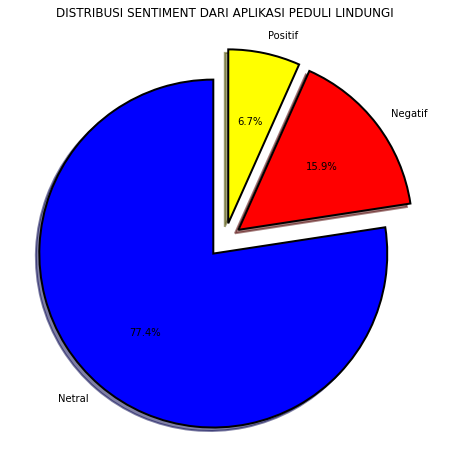

In [ ]:
#Melihat Distribusi Sentimen 
fig = plt.figure(figsize=(8,8))
colors = ("blue", "red", "yellow")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = peduliLindungi['Label_Manual'].value_counts()
explode = (0.1, 0.1, 0.1)

tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')

plt.title('DISTRIBUSI SENTIMENT DARI APLIKASI PEDULI LINDUNGI')

Total data :  704


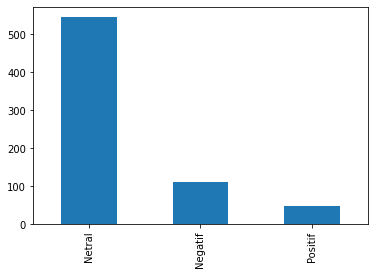

In [ ]:
s = pd.value_counts(peduliLindungi['Label_Manual'])
ax = s.plot.bar()
n = len(peduliLindungi.index)
print("Total data : ", n)

plt.show()

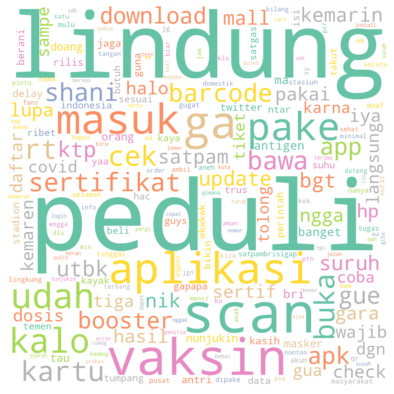

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in peduliLindungi['New_Tweet']])

wordcloud = WordCloud(width=1000, height=1000, random_state=42, background_color='white', colormap='Set2', collocations=False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

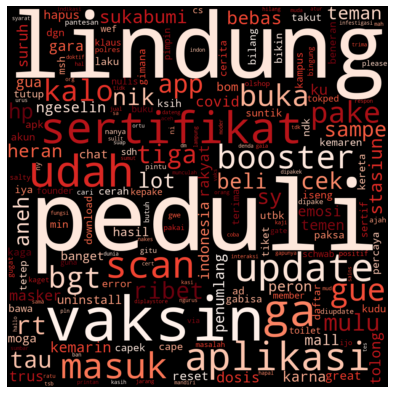

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in peduliLindungi['New_Tweet'][peduliLindungi['Label_Manual'] == "Negatif"]])

wordcloud = WordCloud(width=1000, height=1000, random_state=42, background_color='black', colormap='Reds', collocations=False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

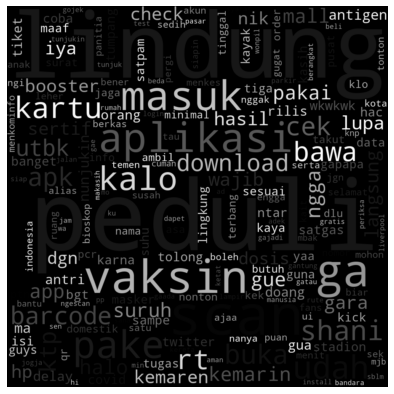

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in peduliLindungi['New_Tweet'][peduliLindungi['Label_Manual'] == "Netral"]])

wordcloud = WordCloud(width=1000, height=1000, random_state=42, background_color='black', colormap='gray', collocations=False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

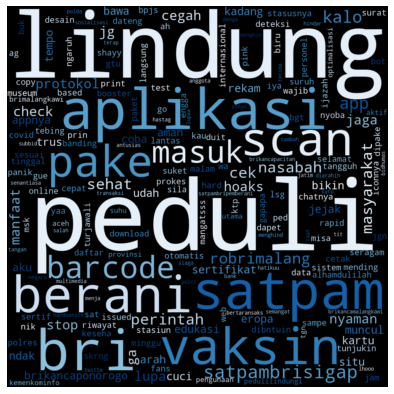

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in peduliLindungi['New_Tweet'][peduliLindungi['Label_Manual'] == "Positif"]])

wordcloud = WordCloud(width=1000, height=1000, random_state=42, background_color='black', colormap='Blues', collocations=False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#MENAMPILKAN TWEET BERLABEL NEGATIF
pd.set_option('display.max_colwidth', 2500)
negatif_tweets = peduliLindungi[peduliLindungi['Label_Manual'] == "Negatif"]
negatif_tweets = negatif_tweets[['New_Tweet', 'Label_Manual']].sort_values(by = 'Label_Manual', ascending=False).reset_index(drop = True)
negatif_tweets.index += 1
negatif_tweets[0:20]

NameError: ignored

In [ ]:
#MENAMPILKAN TWEET BERLABEL Netral
pd.set_option('display.max_colwidth', 2500)
positive_tweets = peduliLindungi[peduliLindungi['Label_Manual'] == "Netral"]
positive_tweets = positive_tweets[['New_Tweet', 'Label_Manual']].sort_values(by = 'Label_Manual', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:20]

,New_Tweet,Label_Manual
1,peduli lindung,Netral
2,gaes adik sepupu wisma atlet hasil pcr positive ct suruh l,Netral
3,code aplikasi peduli lindung dibuild pake flutter,Netral
4,delay gara gara peduli lindung nyua,Netral
5,jogja masuk hotel pake scan peduli lindung,Netral
6,bikin tato barcode biar discan peduli lindung gitu leher bagus,Netral
7,evaluasi hbkb koalisi pejal kaki sorot rendah pindai peduli lindung idcorner,Netral
8,fans liverpool telat masuk stadion gara antri scan peduli lindung,Netral
9,gajadi nonton tiket sold out gajadi nonton regis aplikasi peduli lindung gabawa ktp ga hapal nomor,Netral
10,kalo spontan buka peduli lindung ngga lindung,Netral


In [ ]:
#MENAMPILKAN TWEET BERLABEL Positif
pd.set_option('display.max_colwidth', 2500)
positive_tweets = peduliLindungi[peduliLindungi['Label_Manual'] == "Positif"]
positive_tweets = positive_tweets[['New_Tweet', 'Label_Manual']].sort_values(by = 'Label_Manual', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:20]

,New_Tweet,Label_Manual
1,mending peduli lindung,Positif
2,satpam bri berani senantiasa antusias scan barcode peduli lindung nyaman nasabah bertaransaks,Positif
3,panik shayy alhamdulilah muncul peduli lindung,Positif
4,fans ndak peduli lindung ndak masuk,Positif
5,lupa check in aplikasi peduli lindung yaa brimalangkawi satpambrisigap,Positif
6,masuk provinsi aceh aktif aplikasi peduli lindung,Positif
7,optimalisasi pedulilindungi kemenkominfo aman nyaman tempo eropa aku p,Positif
8,satpam bri berani edukasi pengunaan aplikasi peduli lindung satpambrisigap robrimalang brikancaponorogo,Positif
9,satpam bri berani utama protokol sehat cuci tgn cek suhu scan barcode peduli lindung,Positif
10,satpam bri berani scan barcode aplikasi peduli lindung satpambrisigap robrimalang brikancamalangkawi,Positif


# PEMBAGIAN (TRAIN & TEST) DATA

In [ ]:
from sklearn.model_selection import train_test_split

x = peduliLindungi['New_Tweet'].values
y = peduliLindungi['Label_Manual'].values

from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(ngram_range=(1,1))
x = tf_idf.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

In [ ]:
cekTfidf = pd.DataFrame(x.toarray(), columns=tf_idf.get_feature_names())

cekTfidf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aajaa,abang,abis,absen,acara,aceh,acu,ad,ada,ade,...,yaun,yayah,yeayyy,yee,ygy,yh,yok,yoongi,yuk,zaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cekTfidf.to_csv('cekTfidf.csv', encoding ='utf-8', index=False)

In [ ]:
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
cekTrain = pd.DataFrame(X_train.toarray(), columns=tf_idf.get_feature_names())

cekTrain

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aajaa,abang,abis,absen,acara,aceh,acu,ad,ada,ade,...,yaun,yayah,yeayyy,yee,ygy,yh,yok,yoongi,yuk,zaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cekTest = pd.DataFrame(X_test.toarray(), columns=tf_idf.get_feature_names())

cekTest

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aajaa,abang,abis,absen,acara,aceh,acu,ad,ada,ade,...,yaun,yayah,yeayyy,yee,ygy,yh,yok,yoongi,yuk,zaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train

array(['Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral',
       'Netral', 'Negatif', 'Netral', 'Netral', 'Netral', 'Netral',
       'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral',
       'Netral', 'Netral', 'Netral', 'Netral', 'Positif', 'Netral',
       'Netral', 'Netral', 'Netral', 'Netral', 'Positif', 'Negatif',
       'Netral', 'Positif', 'Netral', 'Netral', 'Netral', 'Netral',
       'Positif', 'Netral', 'Negatif', 'Netral', 'Netral', 'Netral',
       'Netral', 'Negatif', 'Netral', 'Negatif', 'Netral', 'Netral',
       'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Negatif',
       'Netral', 'Netral', 'Netral', 'Netral', 'Negatif', 'Negatif',
       'Netral', 'Negatif', 'Netral', 'Positif', 'Negatif', 'Netral',
       'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral',
       'Netral', 'Netral', 'Positif', 'Negatif', 'Netral', 'Negatif',
       'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral',
       'Netral', 'Netral', 'Netral', 'Netral

In [ ]:
y_test

array(['Netral', 'Negatif', 'Netral', 'Netral', 'Netral', 'Netral',
       'Netral', 'Negatif', 'Netral', 'Netral', 'Netral', 'Negatif',
       'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Positif',
       'Positif', 'Netral', 'Netral', 'Negatif', 'Negatif', 'Negatif',
       'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral',
       'Negatif', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral',
       'Positif', 'Netral', 'Netral', 'Negatif', 'Positif', 'Netral',
       'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral',
       'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral',
       'Netral', 'Negatif', 'Netral', 'Netral', 'Netral', 'Positif',
       'Netral', 'Netral', 'Negatif', 'Netral', 'Netral', 'Positif',
       'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral',
       'Negatif', 'Netral', 'Netral', 'Negatif', 'Netral', 'Negatif',
       'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Positif',
       'Negatif', 'Netral', 'Netral', 'Net

#MODEL NAIVE BAYES CLASSIFIER + OVERSAMPLING

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

modelMNB = MultinomialNB()
modelMNB.fit(X_train, y_train)

y_pred = modelMNB.predict(X_test)

print(f"Accuracy   : {accuracy_score(y_pred, y_test)}")
print(f"Recall     : {recall_score(y_pred, y_test, average = 'macro', labels = np.unique(y_pred))}")
print(f"Precission : {precision_score(y_pred, y_test, average = 'macro')}")
print(f"F1 score   : {f1_score(y_pred, y_test, average = 'macro')}")

Accuracy   : 0.7730496453900709
Recall     : 0.7730496453900709
Precission : 0.3333333333333333
F1 score   : 0.2906666666666667


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(modelMNB.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of Naive Bayes classifier on test set: 0.77
[[  0  23   0]
 [  0 109   0]
 [  0   9   0]]
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        23
      Netral       0.77      1.00      0.87       109
     Positif       0.00      0.00      0.00         9

    accuracy                           0.77       141
   macro avg       0.26      0.33      0.29       141
weighted avg       0.60      0.77      0.67       141



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


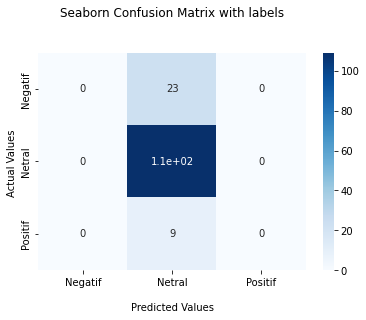

In [ ]:
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negatif','Netral','Positif'])
ax.yaxis.set_ticklabels(['Negatif','Netral','Positif'])

## Display the visualization of the Confusion Matrix.
plt.show()

##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE()
X_smote, y_smote = sm.fit_resample(x, y)
print(sorted(Counter(y_smote).items()))

[('Negatif', 545), ('Netral', 545), ('Positif', 545)]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

X_trainSmote, X_testSmote, y_trainSmote, y_testSmote = train_test_split(X_smote, y_smote, test_size = 0.2, stratify = y_smote, random_state = 0)

modelMNB = MultinomialNB()
modelMNB.fit(X_trainSmote, y_trainSmote)

y_predSmote = modelMNB.predict(X_testSmote)

print(f"Accuracy   : {accuracy_score(y_predSmote, y_testSmote)}")
print(f"Recall     : {recall_score(y_predSmote, y_testSmote, average = 'macro', labels = np.unique(y_predSmote))}")
print(f"Precission : {precision_score(y_predSmote, y_testSmote, average = 'macro')}")
print(f"F1 score   : {f1_score(y_predSmote, y_testSmote, average = 'macro')}")

Accuracy   : 0.8807339449541285
Recall     : 0.8990468112605517
Precission : 0.8807339449541285
F1 score   : 0.8727052709431172


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(modelMNB.score(X_testSmote, y_testSmote)))

confusion_matrix = confusion_matrix(y_testSmote, y_predSmote)
print(confusion_matrix)
print(classification_report(y_testSmote, y_predSmote))

Accuracy of Naive Bayes classifier on test set: 0.88
[[109   0   0]
 [ 22  70  17]
 [  0   0 109]]
              precision    recall  f1-score   support

     Negatif       0.83      1.00      0.91       109
      Netral       1.00      0.64      0.78       109
     Positif       0.87      1.00      0.93       109

    accuracy                           0.88       327
   macro avg       0.90      0.88      0.87       327
weighted avg       0.90      0.88      0.87       327



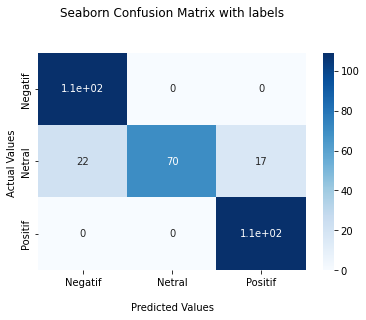

In [ ]:
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negatif','Netral','Positif'])
ax.yaxis.set_ticklabels(['Negatif','Netral','Positif'])

## Display the visualization of the Confusion Matrix.
plt.show()

#MODEL SVM  + OVERSAMPLING

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import *

modelSVM = SVC(kernel = 'rbf', C = 0.5, gamma = 1.0 , decision_function_shape = 'ovr', class_weight = 'balanced')
modelSVM.fit(X_train, y_train)

y_pred = modelSVM.predict(X_test)

print(f'Accuracy   : {accuracy_score(y_pred, y_test)}')
print(f"Recall     : {recall_score(y_pred, y_test, average = 'macro')}")
print(f"Precission : {precision_score(y_pred, y_test, average = 'macro')}")
print(f"F1 score   : {f1_score(y_pred, y_test, average = 'macro')}")

Accuracy   : 0.7943262411347518
Recall     : 0.5284900284900286
Precission : 0.4225501927935115
F1 score   : 0.43872036262203623


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Accuracy of SVM classifier on test set: {:.2f}'.format(modelSVM.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of SVM classifier on test set: 0.79
[[  7  16   0]
 [  2 105   2]
 [  0   9   0]]
              precision    recall  f1-score   support

     Negatif       0.78      0.30      0.44        23
      Netral       0.81      0.96      0.88       109
     Positif       0.00      0.00      0.00         9

    accuracy                           0.79       141
   macro avg       0.53      0.42      0.44       141
weighted avg       0.75      0.79      0.75       141



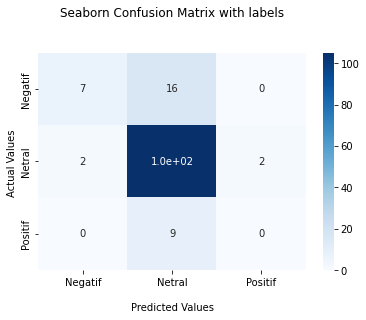

In [ ]:
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negatif','Netral','Positif'])
ax.yaxis.set_ticklabels(['Negatif','Netral','Positif'])

## Display the visualization of the Confusion Matrix.
plt.show()

##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE()
X_smote, y_smote = sm.fit_resample(x, y)
print(sorted(Counter(y_smote).items()))

[('Negatif', 545), ('Netral', 545), ('Positif', 545)]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import *

X_trainSmote, X_testSmote, y_trainSmote, y_testSmote = train_test_split(X_smote, y_smote, test_size = 0.2, stratify = y_smote, random_state = 0)

modelSVM = SVC(kernel = 'rbf', C = 0.5, gamma = 1.0 , decision_function_shape = 'ovr', class_weight = 'balanced')
modelSVM.fit(X_trainSmote, y_trainSmote)

y_predSmote = modelSVM.predict(X_testSmote)

print(f'Accuracy   : {accuracy_score(y_predSmote, y_testSmote)}')
print(f"Recall     : {recall_score(y_predSmote, y_testSmote, average = 'macro')}")
print(f"Precission : {precision_score(y_predSmote, y_testSmote, average = 'macro')}")
print(f"F1 score   : {f1_score(y_predSmote, y_testSmote, average = 'macro')}")

Accuracy   : 0.9541284403669725
Recall     : 0.957429424369136
Precission : 0.9541284403669724
F1 score   : 0.9541738574333771


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Accuracy of SVM classifier on test set: {:.2f}'.format(modelSVM.score(X_testSmote, y_testSmote)))

confusion_matrix = confusion_matrix(y_testSmote, y_predSmote)
print(confusion_matrix)
print(classification_report(y_testSmote, y_predSmote))

Accuracy of SVM classifier on test set: 0.95
[[ 97  12   0]
 [  1 107   1]
 [  0   1 108]]
              precision    recall  f1-score   support

     Negatif       0.99      0.89      0.94       109
      Netral       0.89      0.98      0.93       109
     Positif       0.99      0.99      0.99       109

    accuracy                           0.95       327
   macro avg       0.96      0.95      0.95       327
weighted avg       0.96      0.95      0.95       327



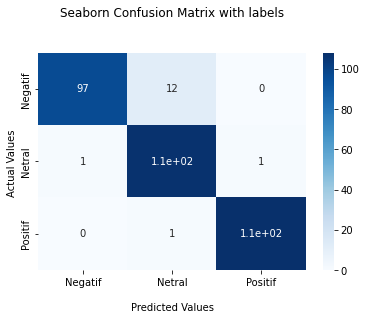

In [ ]:
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negatif','Netral','Positif'])
ax.yaxis.set_ticklabels(['Negatif','Netral','Positif'])

## Display the visualization of the Confusion Matrix.
plt.show()